In [2]:
import pickle 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [3]:
with open('./pickles/df_final.p', 'rb') as read_file:
    df_final=pickle.load(read_file)
    
    
df_final.columns=[column.lower() for column in df_final.columns]    
    
    

non_outliers = df_final[df_final.pos_rk<=90]

valuable_players= non_outliers[(non_outliers.ppg_rk-non_outliers.pos_rk)<0]


In [4]:
non_outliers.shape

(200, 47)

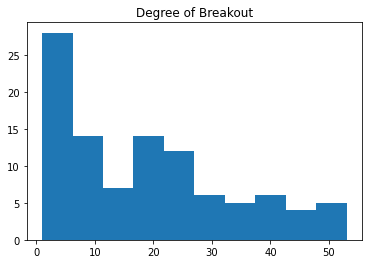

In [5]:


difference = valuable_players.pos_rk-valuable_players.ppg_rk



plt.hist(difference)
plt.title('Degree of Breakout');



In [6]:

valuable_players['difference']= difference


<ipython-input-6-a774bb05dc1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valuable_players['difference']= difference


In [7]:
valuable_players.sort_values(by='difference', ascending=False)

,name,age,ff_rush_att,ff_rush_yds,ff_ypc,ff_rush_td,ff_rec_tgt,ff_rec,ff_rec_yds,ff_rec_td,...,rz_rec_td,rz_fum,rz_fum_lst,rz_ppg,rz_fpts,pos_rk,adp,year,ppg_rk,difference
9,Chris Thompson,29.8,64,294,4.6,2,54,39,510,4,...,2,1,1,2.5,24.6,63,170.0,2017,10,53
37,Wayne Gallman,25.9,111,476,4.3,0,48,34,193,1,...,1,0,0,1.0,13.5,90,303.0,2017,38,52
18,Jerick McKinnon,28.3,151,570,3.8,3,68,51,421,2,...,1,0,0,1.9,30.9,71,243.0,2017,19,52
30,Orleans Darkwa,28.5,171,751,4.4,5,28,19,116,0,...,0,0,0,1.6,24.1,81,278.0,2017,31,50
3,Alvin Kamara,25.1,120,728,6.1,8,101,82,826,5,...,4,0,0,6.0,96.6,52,140.0,2017,4,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,Jonathan Stewart,33.4,198,680,3.4,6,15,8,52,1,...,1,1,1,2.7,40.6,41,101.4,2017,40,1
15,Devonta Freeman,28.4,184,656,3.6,2,70,59,410,4,...,4,1,1,3.8,53.7,17,30.4,2019,16,1
49,Peyton Barber,26.5,154,470,3.1,6,24,16,115,1,...,1,0,0,3.3,53.0,51,131.3,2019,50,1
15,Lamar Miller PUP,29.3,238,888,3.7,3,45,36,327,3,...,3,0,0,3.1,49.2,17,35.2,2017,16,1


In [8]:


non_outliers['pct_change']=(non_outliers.pos_rk-non_outliers.ppg_rk)/non_outliers.pos_rk

<ipython-input-8-84cce540d580>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers['pct_change']=(non_outliers.pos_rk-non_outliers.ppg_rk)/non_outliers.pos_rk


/opt/anaconda3/envs/Fantasy_Football/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


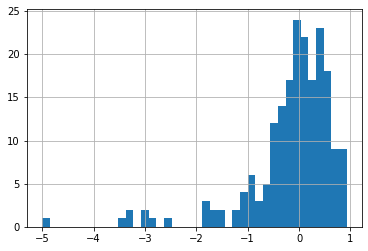

In [9]:
non_outliers.rename({'pct_change': 'rate_change'}, axis=1, inplace=True)
non_outliers.rate_change.hist(bins=40)


In [10]:
non_outliers

,name,age,ff_rush_att,ff_rush_yds,ff_ypc,ff_rush_td,ff_rec_tgt,ff_rec,ff_rec_yds,ff_rec_td,...,rz_rec_td,rz_fum,rz_fum_lst,rz_ppg,rz_fpts,pos_rk,adp,year,ppg_rk,rate_change
0,Todd Gurley II,26.0,279,1305,4.7,13,87,64,788,6,...,4,1,1,8.1,121.3,11,19.4,2017,1,0.909091
1,Le'Veon Bell,28.5,321,1291,4.0,9,106,85,655,2,...,1,0,0,6.3,94.1,2,2.3,2017,2,0.000000
2,Ezekiel Elliott,25.1,242,983,4.1,7,38,26,249,2,...,1,0,0,5.9,58.6,3,6.2,2017,3,0.000000
3,Alvin Kamara,25.1,120,728,6.1,8,101,82,826,5,...,4,0,0,6.0,96.6,52,140.0,2017,4,0.923077
4,Kareem Hunt,25.0,272,1327,4.9,8,63,53,455,3,...,2,0,0,3.7,59.6,10,18.7,2017,5,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,Justice Hill,22.8,58,225,3.9,2,15,8,70,0,...,0,0,0,1.5,23.6,49,120.7,2019,75,-0.530612
75,Darwin Thompson,23.5,38,128,3.4,1,10,9,43,0,...,0,0,0,0.8,9.1,39,86.0,2019,76,-0.948718
76,Bilal Powell,31.8,59,229,3.9,0,12,7,33,0,...,0,0,0,0.1,1.9,75,218.0,2019,77,-0.026667
77,Ty Montgomery,27.6,32,103,3.2,0,17,13,90,0,...,0,0,0,0.2,2.7,59,157.1,2019,78,-0.322034


In [11]:
def create_target(value): 
    
    if value >= 0.25:
        
        return 1
    else:  
        
        return 0
non_outliers['target']=non_outliers.rate_change.apply(create_target)

<ipython-input-11-7899610c865f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers['target']=non_outliers.rate_change.apply(create_target)


In [12]:
non_outliers.head()

,name,age,ff_rush_att,ff_rush_yds,ff_ypc,ff_rush_td,ff_rec_tgt,ff_rec,ff_rec_yds,ff_rec_td,...,rz_fum,rz_fum_lst,rz_ppg,rz_fpts,pos_rk,adp,year,ppg_rk,rate_change,target
0,Todd Gurley II,26.0,279,1305,4.7,13,87,64,788,6,...,1,1,8.1,121.3,11,19.4,2017,1,0.909091,1
1,Le'Veon Bell,28.5,321,1291,4.0,9,106,85,655,2,...,0,0,6.3,94.1,2,2.3,2017,2,0.000000,0
2,Ezekiel Elliott,25.1,242,983,4.1,7,38,26,249,2,...,0,0,5.9,58.6,3,6.2,2017,3,0.000000,0
3,Alvin Kamara,25.1,120,728,6.1,8,101,82,826,5,...,0,0,6.0,96.6,52,140.0,2017,4,0.923077,1
4,Kareem Hunt,25.0,272,1327,4.9,8,63,53,455,3,...,0,0,3.7,59.6,10,18.7,2017,5,0.500000,1


In [13]:
modeling_df=non_outliers.copy()

In [14]:
modeling_df.head()

,name,age,ff_rush_att,ff_rush_yds,ff_ypc,ff_rush_td,ff_rec_tgt,ff_rec,ff_rec_yds,ff_rec_td,...,rz_fum,rz_fum_lst,rz_ppg,rz_fpts,pos_rk,adp,year,ppg_rk,rate_change,target
0,Todd Gurley II,26.0,279,1305,4.7,13,87,64,788,6,...,1,1,8.1,121.3,11,19.4,2017,1,0.909091,1
1,Le'Veon Bell,28.5,321,1291,4.0,9,106,85,655,2,...,0,0,6.3,94.1,2,2.3,2017,2,0.000000,0
2,Ezekiel Elliott,25.1,242,983,4.1,7,38,26,249,2,...,0,0,5.9,58.6,3,6.2,2017,3,0.000000,0
3,Alvin Kamara,25.1,120,728,6.1,8,101,82,826,5,...,0,0,6.0,96.6,52,140.0,2017,4,0.923077,1
4,Kareem Hunt,25.0,272,1327,4.9,8,63,53,455,3,...,0,0,3.7,59.6,10,18.7,2017,5,0.500000,1


## Next Steps
1. Drop Columns that should not be used for modeling
2. Separate features from target
3. train/test split
4. Fit Logistic regression model
5. Predict on Model
6. Evaluate Model


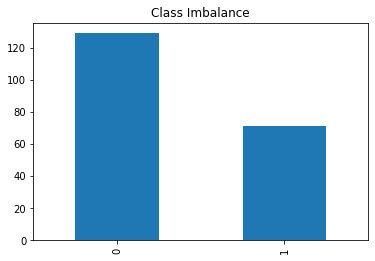

In [15]:
modeling_df.target.value_counts().plot(kind='bar', title='Class Imbalance');

In [16]:
list(modeling_df.columns)

['name',
 'age',
 'ff_rush_att',
 'ff_rush_yds',
 'ff_ypc',
 'ff_rush_td',
 'ff_rec_tgt',
 'ff_rec',
 'ff_rec_yds',
 'ff_rec_td',
 'snapshare',
 'opp_share',
 'shotgun_pct',
 'under center_pct',
 'stacked_front',
 'base_front',
 'light_front',
 'jukerate',
 'tck_evad',
 'tot_yds_ctd',
 'yds_ctd_gm',
 'breakaway_tot',
 'breakaway_rate',
 'fan_pts_att',
 'fan_pts_tgt',
 'fan_pts_opp',
 'tot_dps',
 'drops_rate',
 'ff_fum',
 'ff_fum_lst',
 'ff_ppg',
 'ff_fpts',
 'rz_rush_att',
 'rz_rush_yds',
 'rz_rush_td',
 'rz_rec_tgt',
 'rz_rec',
 'rz_rec_yds',
 'rz_rec_td',
 'rz_fum',
 'rz_fum_lst',
 'rz_ppg',
 'rz_fpts',
 'pos_rk',
 'adp',
 'year',
 'ppg_rk',
 'rate_change',
 'target']

### columns to remove 
- ff_fpts
- ff_ppg
- ppg_rk
- rate_change
- year
- name
- adp

In [17]:

modeling_df=modeling_df.drop(['ff_fpts', 'ff_ppg', 'ppg_rk', 'rate_change', 'year',
                              'name', 'adp'], axis=1)

In [18]:
modeling_df.head()

,age,ff_rush_att,ff_rush_yds,ff_ypc,ff_rush_td,ff_rec_tgt,ff_rec,ff_rec_yds,ff_rec_td,snapshare,...,rz_rec_tgt,rz_rec,rz_rec_yds,rz_rec_td,rz_fum,rz_fum_lst,rz_ppg,rz_fpts,pos_rk,target
0,26.0,279,1305,4.7,13,87,64,788,6,83.9 %,...,11,6,52,4,1,1,8.1,121.3,11,1
1,28.5,321,1291,4.0,9,106,85,655,2,91.7 %,...,15,10,50,1,0,0,6.3,94.1,2,0
2,25.1,242,983,4.1,7,38,26,249,2,88.8 %,...,3,3,15,1,0,0,5.9,58.6,3,0
3,25.1,120,728,6.1,8,101,82,826,5,44.3 %,...,17,14,94,4,0,0,6.0,96.6,52,1
4,25.0,272,1327,4.9,8,63,53,455,3,69.9 %,...,9,6,12,2,0,0,3.7,59.6,10,1


In [19]:
with open('./pickles/modeling_df.p', 'wb') as write_file:
    pickle.dump(modeling_df, write_file)

In [20]:
modeling_df.head()

,age,ff_rush_att,ff_rush_yds,ff_ypc,ff_rush_td,ff_rec_tgt,ff_rec,ff_rec_yds,ff_rec_td,snapshare,...,rz_rec_tgt,rz_rec,rz_rec_yds,rz_rec_td,rz_fum,rz_fum_lst,rz_ppg,rz_fpts,pos_rk,target
0,26.0,279,1305,4.7,13,87,64,788,6,83.9 %,...,11,6,52,4,1,1,8.1,121.3,11,1
1,28.5,321,1291,4.0,9,106,85,655,2,91.7 %,...,15,10,50,1,0,0,6.3,94.1,2,0
2,25.1,242,983,4.1,7,38,26,249,2,88.8 %,...,3,3,15,1,0,0,5.9,58.6,3,0
3,25.1,120,728,6.1,8,101,82,826,5,44.3 %,...,17,14,94,4,0,0,6.0,96.6,52,1
4,25.0,272,1327,4.9,8,63,53,455,3,69.9 %,...,9,6,12,2,0,0,3.7,59.6,10,1


In [21]:
modeling_df.columns

Index(['age', 'ff_rush_att', 'ff_rush_yds', 'ff_ypc', 'ff_rush_td',
       'ff_rec_tgt', 'ff_rec', 'ff_rec_yds', 'ff_rec_td', 'snapshare',
       'opp_share', 'shotgun_pct', 'under center_pct', 'stacked_front',
       'base_front', 'light_front', 'jukerate', 'tck_evad', 'tot_yds_ctd',
       'yds_ctd_gm', 'breakaway_tot', 'breakaway_rate', 'fan_pts_att',
       'fan_pts_tgt', 'fan_pts_opp', 'tot_dps', 'drops_rate', 'ff_fum',
       'ff_fum_lst', 'rz_rush_att', 'rz_rush_yds', 'rz_rush_td', 'rz_rec_tgt',
       'rz_rec', 'rz_rec_yds', 'rz_rec_td', 'rz_fum', 'rz_fum_lst', 'rz_ppg',
       'rz_fpts', 'pos_rk', 'target'],
      dtype='object')

In [81]:
#snapshare
#opp_share
#shotgun_pct
#under center_pct
#stacked_front
#base_front
#light_front
#stacked_front
#jukerate
#breakaway_rate
#drops_rate

#df4['x5'] = list(map(lambda x: x[:-1], df4['x5'].values))
#df4['x6'] = list(map(lambda x: x[:-1], df4['x6'].values))
#df4['x7'] = list(map(lambda x: x[:-1], df4['x7'].values))

0      2.3 %
1      5.7 %
2     10.5 %
3      5.0 %
4      6.3 %
       ...  
74     6.7 %
75    10.0 %
76    25.0 %
77     0.0 %
78    16.7 %
Name: drops_rate, Length: 200, dtype: object

In [22]:
modeling_df['snapshare'] = list(map(lambda x: x[:-1], modeling_df['snapshare'].values))
modeling_df['opp_share'] = list(map(lambda x: x[:-1], modeling_df['opp_share'].values))
modeling_df['shotgun_pct'] = list(map(lambda x: x[:-1], modeling_df['shotgun_pct'].values))
modeling_df['under center_pct'] = list(map(lambda x: x[:-1], modeling_df['under center_pct'].values))
modeling_df['stacked_front'] = list(map(lambda x: x[:-1], modeling_df['stacked_front'].values))
modeling_df['base_front'] = list(map(lambda x: x[:-1], modeling_df['base_front'].values))
modeling_df['light_front'] = list(map(lambda x: x[:-1], modeling_df['light_front'].values))
modeling_df['jukerate'] = list(map(lambda x: x[:-1], modeling_df['jukerate'].values))
modeling_df['breakaway_rate'] = list(map(lambda x: x[:-1], modeling_df['breakaway_rate'].values))
modeling_df['drops_rate'] = list(map(lambda x: x[:-1], modeling_df['drops_rate'].values))


#df4['x5'] = [float(x) for x in df4['x5'].values]
#df4['x6'] = [float(x) for x in df4['x6'].values]
#df4['x7'] = [float(x) for x in df4['x7'].values]


In [24]:
modeling_df.snapshare

0     83.9 
1     91.7 
2     88.8 
3     44.3 
4     69.9 
      ...  
74    16.6 
75    15.1 
76    21.2 
77    13.9 
78    14.4 
Name: snapshare, Length: 200, dtype: object

In [25]:
modeling_df['snapshare'] = [float(x) for x in modeling_df['snapshare'].values]
modeling_df['opp_share'] = [float(x) for x in modeling_df['opp_share'].values]
modeling_df['shotgun_pct'] = [float(x) for x in modeling_df['shotgun_pct'].values]
modeling_df['under center_pct'] = [float(x) for x in modeling_df['under center_pct'].values]
modeling_df['stacked_front'] = [float(x) for x in modeling_df['stacked_front'].values]
modeling_df['base_front'] = [float(x) for x in modeling_df['base_front'].values]
modeling_df['light_front'] = [float(x) for x in modeling_df['light_front'].values]
modeling_df['jukerate'] = [float(x) for x in modeling_df['jukerate'].values]
modeling_df['breakaway_rate'] = [float(x) for x in modeling_df['breakaway_rate'].values]
modeling_df['drops_rate'] = [float(x) for x in modeling_df['drops_rate'].values]


In [26]:
modeling_df.snapshare

0     83.9
1     91.7
2     88.8
3     44.3
4     69.9
      ... 
74    16.6
75    15.1
76    21.2
77    13.9
78    14.4
Name: snapshare, Length: 200, dtype: float64

In [27]:
new_modeling_df = modeling_df.copy()

In [29]:
new_modeling_df.head()

,age,ff_rush_att,ff_rush_yds,ff_ypc,ff_rush_td,ff_rec_tgt,ff_rec,ff_rec_yds,ff_rec_td,snapshare,...,rz_rec_tgt,rz_rec,rz_rec_yds,rz_rec_td,rz_fum,rz_fum_lst,rz_ppg,rz_fpts,pos_rk,target
0,26.0,279,1305,4.7,13,87,64,788,6,83.9,...,11,6,52,4,1,1,8.1,121.3,11,1
1,28.5,321,1291,4.0,9,106,85,655,2,91.7,...,15,10,50,1,0,0,6.3,94.1,2,0
2,25.1,242,983,4.1,7,38,26,249,2,88.8,...,3,3,15,1,0,0,5.9,58.6,3,0
3,25.1,120,728,6.1,8,101,82,826,5,44.3,...,17,14,94,4,0,0,6.0,96.6,52,1
4,25.0,272,1327,4.9,8,63,53,455,3,69.9,...,9,6,12,2,0,0,3.7,59.6,10,1


In [30]:
with open('./pickles/new_modeling_df.p', 'wb') as write_file:
    pickle.dump(new_modeling_df, write_file)